In [1]:
# visualization and manipulation libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import datetime

#pd.options.display.float_format = '{:,.2f}'.format

from IPython.core.pylabtools import figsize

%matplotlib inline
# to display visuals in the notebook

%config InlineBackend.figure_format='retina'
#to enable high resolution plots

# to bypass warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 60)

In [3]:
wines = pd.read_csv("../data_root/raw/wine_dataset.csv")
# TODO do it in one line
wines.drop(columns = "Unnamed: 0", inplace = True)

# 1. Understand Data

## 1.1. Observe Some Rows

In [4]:
wines.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Fragrances suggest hay, crushed tomato vine an...",Kirchleiten,90,30.0,Northeastern Italy,Alto Adige,NaN,Kerin O’Keefe,@kerinokeefe,Tiefenbrunner 2012 Kirchleiten Sauvignon (Alto...,Sauvignon,Tiefenbrunner
1,France,"Packed with fruit and crisp acidity, this is a...",NaN,87,22.0,Loire Valley,Sancerre,NaN,Roger Voss,@vossroger,Bernard Reverdy et Fils 2014 Rosé (Sancerre),Rosé,Bernard Reverdy et Fils
2,Italy,"This easy, ruby-red wine displays fresh berry ...",NaN,86,NaN,Tuscany,Chianti Classico,NaN,NaN,NaN,Dievole 2009 Chianti Classico,Sangiovese,Dievole
3,US,Pretty in violet and rose petals this is a low...,Horseshoe Bend Vineyard,92,50.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Davis Family 2012 Horseshoe Bend Vineyard Pino...,Pinot Noir,Davis Family
4,US,This golden wine confounds in a mix of wet sto...,Dutton Ranch,93,38.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Dutton-Goldfield 2013 Dutton Ranch Chardonnay ...,Chardonnay,Dutton-Goldfield


In [5]:
wines.sample(5)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
6390,US,Despite coming from the even-keeled 2012 vinta...,NaN,84,16.0,Idaho,NaN,NaN,Sean P. Sullivan,@wawinereport,Sawtooth 2012 Merlot,Merlot,Sawtooth
5820,Italy,Barolo Sorano (from the Serralunga d'Alba area...,Sorano,94,NaN,Piedmont,Barolo,NaN,NaN,NaN,Claudio Alario 2006 Sorano (Barolo),Nebbiolo,Claudio Alario
4060,US,"The brawniest of Hunt's releases, it borders o...",Outlaw Ridge Zinphony #1,85,30.0,California,Paso Robles,Central Coast,NaN,NaN,Hunt Cellars 2000 Outlaw Ridge Zinphony #1 Zin...,Zinfandel,Hunt Cellars
6397,US,"Dark, bone dry and tannic, a full-bodied wine ...",NaN,87,12.0,California,Central Coast,Central Coast,NaN,NaN,Estancia 2007 Shiraz (Central Coast),Shiraz,Estancia
8194,France,While this wine demonstrates the telltale cool...,Caradeux Premier Cru,91,45.0,Burgundy,Pernand-Vergelesses,NaN,Roger Voss,@vossroger,Louis Latour 2011 Caradeux Premier Cru (Perna...,Chardonnay,Louis Latour


In [6]:
print("There are {} rows and {} columns in the dataset."
      .format(wines.shape[0], wines.shape[1]))

There are 10000 rows and 13 columns in the dataset.


## 1.2. Information about columns and descriptive statistics

In [7]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                9994 non-null   object 
 1   description            10000 non-null  object 
 2   designation            7171 non-null   object 
 3   points                 10000 non-null  int64  
 4   price                  9323 non-null   float64
 5   province               9994 non-null   object 
 6   region_1               8336 non-null   object 
 7   region_2               3853 non-null   object 
 8   taster_name            8015 non-null   object 
 9   taster_twitter_handle  7644 non-null   object 
 10  title                  10000 non-null  object 
 11  variety                10000 non-null  object 
 12  winery                 10000 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1015.8+ KB


### 1.2.1. Percentage of missing values

In [8]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(wines)

Your selected dataframe has 13 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
region_2,6147,61.5
designation,2829,28.3
taster_twitter_handle,2356,23.6
taster_name,1985,19.8
region_1,1664,16.6
price,677,6.8
country,6,0.1
province,6,0.1


More than 50% of the data is missing in the region_2 column. Majority of the data being missing may mislead the machine learning models so it will be dropped in the *Drop Columns* part. 

Rest of the columns will be investigated further.

### 1.2.2. Check for cardinality of the object columns

In [9]:
for column in wines.select_dtypes(include="object").columns:
    print("{} has {} unique values.".format(column, wines[column].nunique()))

country has 37 unique values.
description has 9942 unique values.
designation has 5381 unique values.
province has 248 unique values.
region_1 has 724 unique values.
region_2 has 17 unique values.
taster_name has 18 unique values.
taster_twitter_handle has 14 unique values.
title has 9930 unique values.
variety has 333 unique values.
winery has 5460 unique values.


We have some high-cardinality columns:
* description
* designation
* region_1
* title
* winery

In addition to the region_2, they will be dropped in the *Drop Columns* part to keep things simple.

We are going to explore the top 4 low-cardinality columns in the exploratory data analysis:
* country
* province
* taster_name
* taster_twitter_handle
* variety

Let's see if there are some valuable info available in the free-text like columns first

### 1.2.3. Year from Title

In [10]:
# function to fetch year from title column
# write the dunction here

wines["title_numlist"] = wines.title.str.findall(r'\b\d+\b')#, )

def find_production_year(title):
    int_list = []
    now = datetime.datetime.now()
    
    for item in title:
        int_list.append(int(item))
    
    for item in int_list:
        if item <= now.year and item >= 1900:
            return item
        else:
            return 0

In [11]:
wines["year"] = wines.title_numlist.apply(find_production_year)

In [12]:
wines.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,title_numlist,year
0,Italy,"Fragrances suggest hay, crushed tomato vine an...",Kirchleiten,90,30.0,Northeastern Italy,Alto Adige,NaN,Kerin O’Keefe,@kerinokeefe,Tiefenbrunner 2012 Kirchleiten Sauvignon (Alto...,Sauvignon,Tiefenbrunner,[2012],2012.0
1,France,"Packed with fruit and crisp acidity, this is a...",NaN,87,22.0,Loire Valley,Sancerre,NaN,Roger Voss,@vossroger,Bernard Reverdy et Fils 2014 Rosé (Sancerre),Rosé,Bernard Reverdy et Fils,[2014],2014.0
2,Italy,"This easy, ruby-red wine displays fresh berry ...",NaN,86,NaN,Tuscany,Chianti Classico,NaN,NaN,NaN,Dievole 2009 Chianti Classico,Sangiovese,Dievole,[2009],2009.0
3,US,Pretty in violet and rose petals this is a low...,Horseshoe Bend Vineyard,92,50.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Davis Family 2012 Horseshoe Bend Vineyard Pino...,Pinot Noir,Davis Family,[2012],2012.0
4,US,This golden wine confounds in a mix of wet sto...,Dutton Ranch,93,38.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Dutton-Goldfield 2013 Dutton Ranch Chardonnay ...,Chardonnay,Dutton-Goldfield,[2013],2013.0


In [13]:
wines["year"].value_counts()

2012.0    1239
2014.0    1209
2013.0    1165
2011.0     960
2010.0     935
2015.0     784
2009.0     762
2008.0     567
2007.0     514
2006.0     425
2016.0     302
2005.0     261
2004.0     143
0.0         68
2000.0      61
2001.0      54
1999.0      51
1998.0      45
2003.0      41
2002.0      34
1997.0      21
1995.0       8
1994.0       2
1989.0       2
1996.0       2
1961.0       1
1992.0       1
1947.0       1
1990.0       1
1967.0       1
2017.0       1
1966.0       1
1984.0       1
Name: year, dtype: int64

In [14]:
wines["year"].unique()

array([2012., 2014., 2009., 2013., 2007., 2008., 2010., 2000., 2011.,
       2001., 2002., 2006., 2005., 2015., 1999.,   nan, 2016., 1997.,
       1989., 1994., 1998., 2004., 2003.,    0., 1984., 1996., 1995.,
       1990., 1967., 2017., 1992., 1947., 1961., 1966.])

### Find most occuring words in description

In [15]:
#from collections import Counter

In [16]:
#all_descriptions = ""
#for item in list(wines.description.unique()):
#    all_descriptions += item


In [17]:
#split_it = all_descriptions.split() 
#Counter = Counter(split_it)

In [18]:
#most_occur = Counter.most_common(100) 

In [19]:
#print(most_occur)

In [20]:
wines.description.unique()[:5]

array(["Fragrances suggest hay, crushed tomato vine and exotic fruit. The bright but structured palate delivers peach, papaya, cantaloupe and energizing mineral notes alongside fresh acidity. It's nicely balanced with good length,",
       'Packed with fruit and crisp acidity, this is a bright, light and perfumed wine. Red-berry flavors are lifted by red currants and a light spice. Drink now for total freshness.',
       'This easy, ruby-red wine displays fresh berry flavors and a light, crisp mouthfeel. Pair this no-fuss wine with homemade pasta sauce or potato gnocchi and cheese.',
       'Pretty in violet and rose petals this is a lower-octane Pinot Noir for the winery. Exquisitely rendered in spicy dark cherry and soft, supple tannins, it hails from a cool, coastal vineyard site 1,000 feet atop Occidental Ridge, the coolest source of grapes for Davis.',
       'This golden wine confounds in a mix of wet stone and caramel on the nose, the body creamy in vanilla. Fuller in style and 

### Extract  Red, White, rose, sparkling, sweet and dry from description

In [21]:
wines["is_red"] = wines['description'].str.contains(r'red|RED|Red', regex = True).astype('uint8')

In [22]:
wines["is_red"].value_counts()

0    7193
1    2807
Name: is_red, dtype: int64

In [23]:
wines["is_white"] = wines['description'].str.contains(r'white|WHITE|White', regex = True).astype('uint8')

In [24]:
wines["is_white"].value_counts()

0    9082
1     918
Name: is_white, dtype: int64

In [25]:
wines["is_rose"] = wines['description'].str.contains(r'rose|ROSE|Rose|rosé|Rosé|ROSÉ', regex = True).astype('uint8')

In [26]:
wines["is_rose"].value_counts()

0    9540
1     460
Name: is_rose, dtype: int64

In [27]:
wines["is_sparkling"] = wines['description'].str.contains(r'sparkling|SPARKLING|Sparkling', regex = True).astype('uint8')

In [28]:
wines["is_sparkling"].value_counts()

0    9935
1      65
Name: is_sparkling, dtype: int64

In [29]:
wines["is_dry"] = wines['description'].str.contains(r'dry|DRY|Dry', regex = True).astype('uint8')

In [30]:
wines["is_dry"].value_counts()

0    8551
1    1449
Name: is_dry, dtype: int64

In [31]:
wines["is_sweet"] = wines['description'].str.contains(r'sweet|SWEETS|Sweet', regex = True).astype('uint8')

In [32]:
wines["is_sweet"].value_counts()

0    8817
1    1183
Name: is_sweet, dtype: int64

In [33]:
wines.iloc[29,]["description"]

"I can't recall a misstep from this reliable producer of Tasmanian sparkling. The latest vintage release is remarkably fresh and zesty, bursting with green apple and citrus, with just hints of toasted brioche. This light- to medium-bodied wine is a blend of 53% Chardonnay and 47% Pinot Noir."

In [34]:
wines[wines["is_white"] == 0]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,title_numlist,year,is_red,is_white,is_rose,is_sparkling,is_dry,is_sweet
0,Italy,"Fragrances suggest hay, crushed tomato vine an...",Kirchleiten,90,30.0,Northeastern Italy,Alto Adige,NaN,Kerin O’Keefe,@kerinokeefe,Tiefenbrunner 2012 Kirchleiten Sauvignon (Alto...,Sauvignon,Tiefenbrunner,[2012],2012.0,1,0,0,0,0,0
1,France,"Packed with fruit and crisp acidity, this is a...",NaN,87,22.0,Loire Valley,Sancerre,NaN,Roger Voss,@vossroger,Bernard Reverdy et Fils 2014 Rosé (Sancerre),Rosé,Bernard Reverdy et Fils,[2014],2014.0,1,0,0,0,0,0
2,Italy,"This easy, ruby-red wine displays fresh berry ...",NaN,86,NaN,Tuscany,Chianti Classico,NaN,NaN,NaN,Dievole 2009 Chianti Classico,Sangiovese,Dievole,[2009],2009.0,1,0,0,0,0,0
3,US,Pretty in violet and rose petals this is a low...,Horseshoe Bend Vineyard,92,50.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Davis Family 2012 Horseshoe Bend Vineyard Pino...,Pinot Noir,Davis Family,[2012],2012.0,1,0,1,0,0,0
4,US,This golden wine confounds in a mix of wet sto...,Dutton Ranch,93,38.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Dutton-Goldfield 2013 Dutton Ranch Chardonnay ...,Chardonnay,Dutton-Goldfield,[2013],2013.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,France,"The fruit bursts out of the glass, while the s...",NaN,92,NaN,Burgundy,Echézeaux,NaN,Roger Voss,@vossroger,Bouchard Aîné & Fils 2005 Echézeaux,Pinot Noir,Bouchard Aîné & Fils,[2005],2005.0,1,0,0,0,0,0
9996,US,There's a noticeable tilt of barrel reduction ...,Magnolia,87,30.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Krutz 2014 Magnolia Pinot Noir (Sonoma Coast),Pinot Noir,Krutz,[2014],2014.0,1,0,0,0,0,0
9997,France,"This perfumed, herbal blend of Syrah and Grena...",Rosé in the Air,86,19.0,Provence,Côtes de Provence,NaN,Roger Voss,@vossroger,Château Roquefeuille 2016 Rosé in the Air Rosé...,Rosé,Château Roquefeuille,[2016],2016.0,0,0,1,0,1,0
9998,Spain,Berry candy and licorice aromas become more su...,NaN,88,32.0,Northern Spain,Toro,NaN,Michael Schachner,@wineschach,Monte Hiniesta 2009 Toro,Tinta de Toro,Monte Hiniesta,[2009],2009.0,0,0,0,0,0,0


### Extract is_blend from variety

In [35]:
def find_if_blend(variety):
    if (variety.find("-") != -1) | (variety.find("Blend") != -1):
        if variety == "Xarel-lo":
            return 0
        else:
            return 1
    else:
        return 0

In [36]:
wines["is_blend"] = wines.variety.apply(find_if_blend)

In [37]:
wines["is_blend"].value_counts()

0    7850
1    2150
Name: is_blend, dtype: int64

In [38]:
wines.iloc[6188,]

country                                                              Spain
description              Bland aromas suggest applesauce. This varietal...
designation                                                             XA
points                                                                  84
price                                                                   14
province                                                         Catalonia
region_1                                                           Penedès
region_2                                                               NaN
taster_name                                              Michael Schachner
taster_twitter_handle                                          @wineschach
title                              Albet I Noya 2014 XA Xarel-lo (Penedès)
variety                                                           Xarel-lo
winery                                                        Albet I Noya
title_numlist            

In [39]:
wines[wines["is_blend"] == 0].sample(20)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,title_numlist,year,is_red,is_white,is_rose,is_sparkling,is_dry,is_sweet,is_blend
7550,US,One of the more engaging single-vineyard expre...,Doctor's Vineyard,93,66.0,California,Santa Lucia Highlands,Central Coast,Matt Kettmann,@mattkettmann,Testarossa 2014 Doctor's Vineyard Pinot Noir (...,Pinot Noir,Testarossa,[2014],2014.0,1,0,0,0,0,0,0
7162,Italy,This Tuscan Merlot shows unripe aromas of gree...,Colle dei Mandorli,84,35.0,Tuscany,Toscana,NaN,NaN,NaN,Tenuta San Vito 2007 Colle dei Mandorli Merlot...,Merlot,Tenuta San Vito,[2007],2007.0,0,0,0,0,0,0,0
3623,US,A waxy vein of petroleum cuts enticingly throu...,No. 198 Single Vineyard Reserve,91,19.0,New York,Finger Lakes,Finger Lakes,Anna Lee C. Iijima,NaN,Boundary Breaks 2013 No. 198 Single Vineyard R...,Riesling,Boundary Breaks,"[2013, 198]",2013.0,0,0,0,0,0,1,0
1834,US,This wine opens with a rich nose of graham cra...,Sangiacomo Vineyard,87,35.0,California,Carneros,Napa-Sonoma,Virginie Boone,@vboone,B.R. Cohn 2015 Sangiacomo Vineyard Chardonnay ...,Chardonnay,B.R. Cohn,[2015],2015.0,0,0,0,0,0,1,0
6312,US,"Exceptionally fragrant, it sends up scents of ...",Original Vines Reserve,94,45.0,Oregon,Dundee Hills,Willamette Valley,Paul Gregutt,@paulgwine,The Eyrie Vineyards 2011 Original Vines Reserv...,Chardonnay,The Eyrie Vineyards,[2011],2011.0,0,1,0,0,0,0,0
5178,US,From grapes grown at some of the Willamette Va...,Aegrina Vineyard,91,65.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Penner-Ash 2014 Aegrina Vineyard Pinot Noir (M...,Pinot Noir,Penner-Ash,[2014],2014.0,0,0,0,0,0,0,0
2411,Italy,"This simple, refreshing white has a subdued no...",White Label,85,NaN,Piedmont,Gavi,NaN,Kerin O’Keefe,@kerinokeefe,La Scolca 2015 White Label (Gavi),Cortese,La Scolca,[2015],2015.0,0,1,0,0,0,0,0
1660,US,"Though just 12% alcohol, this wine is ripe and...",Carter Vineyard,90,50.0,Oregon,Eola-Amity Hills,Willamette Valley,Paul Gregutt,@paulgwine,Ken Wright 2010 Carter Vineyard Pinot Noir (Eo...,Pinot Noir,Ken Wright,[2010],2010.0,0,0,0,0,0,0,0
357,France,"Smooth, round and soft, this has an open chara...",Le Grand Bois,87,NaN,Burgundy,Chablis,NaN,Roger Voss,@vossroger,Romain Bouchard 2010 Le Grand Bois (Chablis),Chardonnay,Romain Bouchard,[2010],2010.0,0,0,0,0,0,0,0
1716,Italy,Alessandro Locatelli represents the newest gen...,Bricco Francesco,91,NaN,Piedmont,Barolo,NaN,NaN,NaN,Rocche Costamagna 2005 Bricco Francesco (Barolo),Nebbiolo,Rocche Costamagna,[2005],2005.0,0,0,0,0,0,1,0


### 1.2.4. Check unique values of taster_name and taster_twitter_handle

In [40]:
wines["taster_name"].unique()

array(['Kerin O’Keefe', 'Roger Voss', nan, 'Virginie Boone',
       'Anna Lee C. Iijima', 'Sean P. Sullivan', 'Lauren Buzzeo',
       'Joe Czerwinski', 'Michael Schachner', 'Paul Gregutt',
       'Jim Gordon', 'Matt Kettmann', 'Anne Krebiehl\xa0MW',
       'Susan Kostrzewa', 'Jeff Jenssen', 'Carrie Dykes', 'Mike DeSimone',
       'Alexander Peartree', 'Fiona Adams'], dtype=object)

In [41]:
wines["taster_twitter_handle"].unique()

array(['@kerinokeefe', '@vossroger', nan, '@vboone', '@wawinereport',
       '@laurbuzz', '@JoeCz', '@wineschach', '@paulgwine\xa0',
       '@gordone_cellars', '@mattkettmann', '@AnneInVino',
       '@suskostrzewa', '@worldwineguys', '@bkfiona'], dtype=object)

taster_name covers the values of taster_twitter_handle mostly and it has less missing values. So, taster_twitter_handle will be dropped.

### 1.2.4. Drop Columns

In [42]:
#wines.drop(columns = ["region_2", 
#                      "description", 
#                      "designation", 
#                      "region_1", 
#                      "title", 
#                      "winery", 
#                      "taster_twitter_handle"],
#           inplace=True)

In [43]:
wines.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,title_numlist,year,is_red,is_white,is_rose,is_sparkling,is_dry,is_sweet,is_blend
0,Italy,"Fragrances suggest hay, crushed tomato vine an...",Kirchleiten,90,30.0,Northeastern Italy,Alto Adige,NaN,Kerin O’Keefe,@kerinokeefe,Tiefenbrunner 2012 Kirchleiten Sauvignon (Alto...,Sauvignon,Tiefenbrunner,[2012],2012.0,1,0,0,0,0,0,0
1,France,"Packed with fruit and crisp acidity, this is a...",NaN,87,22.0,Loire Valley,Sancerre,NaN,Roger Voss,@vossroger,Bernard Reverdy et Fils 2014 Rosé (Sancerre),Rosé,Bernard Reverdy et Fils,[2014],2014.0,1,0,0,0,0,0,0
2,Italy,"This easy, ruby-red wine displays fresh berry ...",NaN,86,NaN,Tuscany,Chianti Classico,NaN,NaN,NaN,Dievole 2009 Chianti Classico,Sangiovese,Dievole,[2009],2009.0,1,0,0,0,0,0,0
3,US,Pretty in violet and rose petals this is a low...,Horseshoe Bend Vineyard,92,50.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Davis Family 2012 Horseshoe Bend Vineyard Pino...,Pinot Noir,Davis Family,[2012],2012.0,1,0,1,0,0,0,0
4,US,This golden wine confounds in a mix of wet sto...,Dutton Ranch,93,38.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Dutton-Goldfield 2013 Dutton Ranch Chardonnay ...,Chardonnay,Dutton-Goldfield,[2013],2013.0,0,0,0,0,0,0,0


In [44]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                9994 non-null   object 
 1   description            10000 non-null  object 
 2   designation            7171 non-null   object 
 3   points                 10000 non-null  int64  
 4   price                  9323 non-null   float64
 5   province               9994 non-null   object 
 6   region_1               8336 non-null   object 
 7   region_2               3853 non-null   object 
 8   taster_name            8015 non-null   object 
 9   taster_twitter_handle  7644 non-null   object 
 10  title                  10000 non-null  object 
 11  variety                10000 non-null  object 
 12  winery                 10000 non-null  object 
 13  title_numlist          10000 non-null  object 
 14  year                   9663 non-null   float64
 15  is_

## 1.3. Summary from Understand Data

Sample dataset and its values assumed to be consistent. Target value (points), the value that we are going to predict has no NA values. We have one numeric feature: price. Rest of the features are in string format some representing categorical data like country and taster_name.

High cardinality columns are dropped to keep the training dataset simple. High missing value columns are also dropped due to their added value to predict the target is expected to be low. Moreover, taster_twitter_handle feature also dropped after a manual observation of the unique values because all of its values are already covered under taster_names feature.

Remaining features will be explored and outliers will be removed in the *Exploratory Data Analysis* part.

# 2. Exploratory Data Analysis

## 2.1. Single Variable Plots

### 2.1.1. Distribution of Points

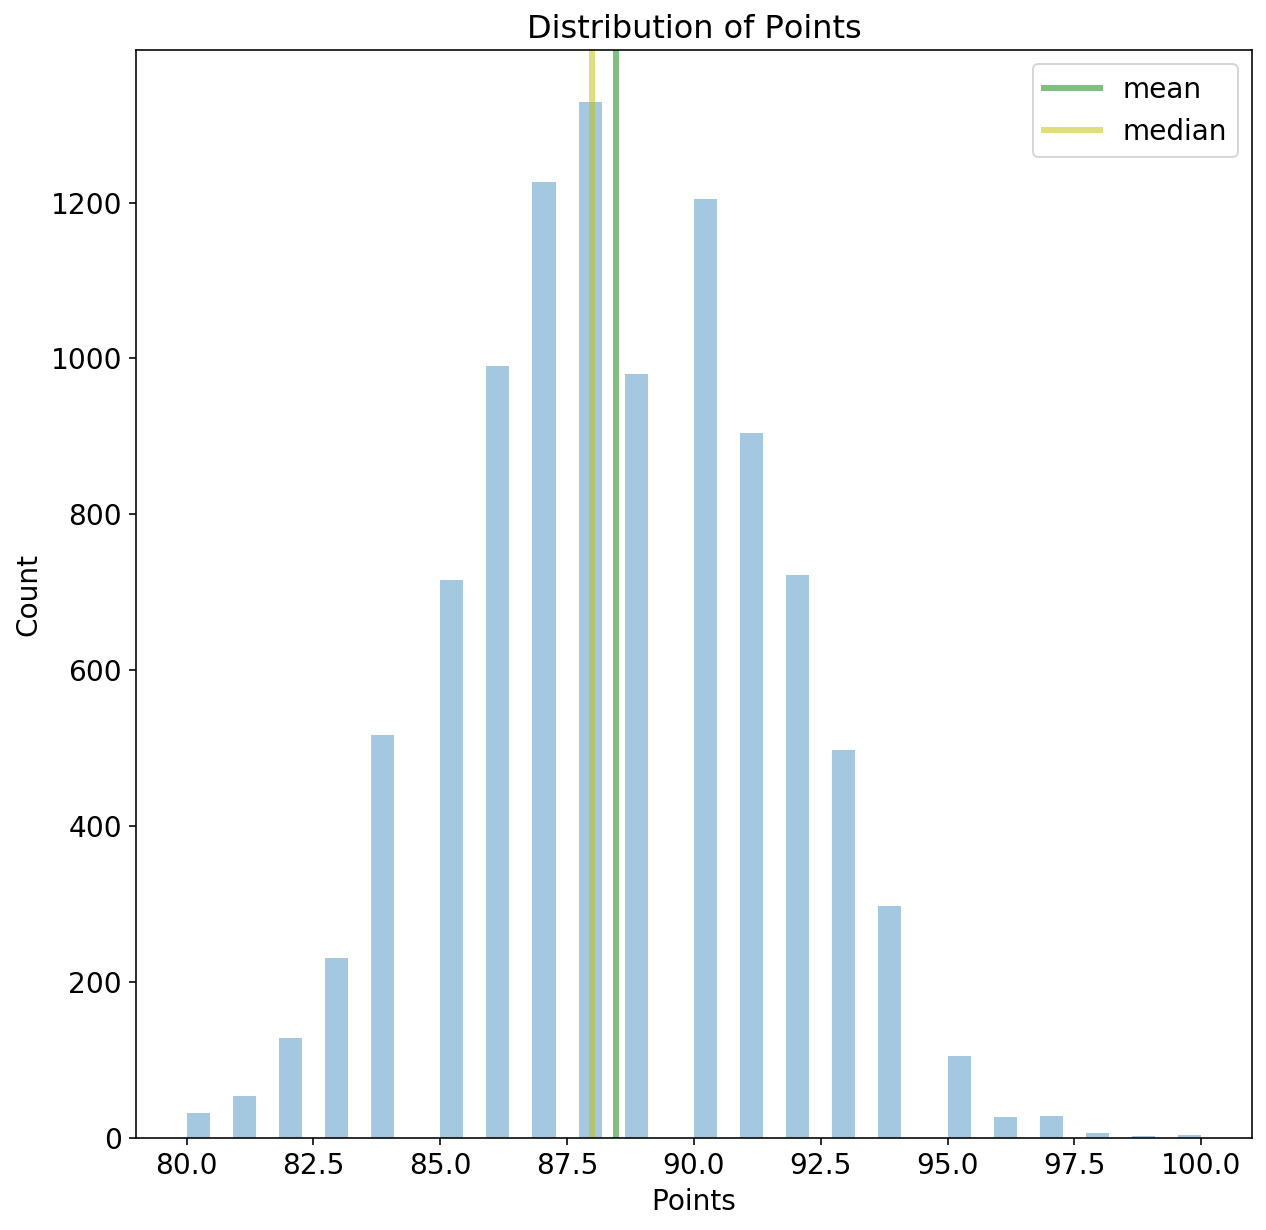

In [45]:
# set the plot size
figsize(10, 10)
plt.rcParams['font.size'] = 14

# set the histogram, mean and median
sns.distplot(wines["points"], kde=False)
plt.axvline(x=wines.points.mean(), 
            linewidth=3,
            color='g', 
            label="mean", 
            alpha=0.5)
plt.axvline(x=wines.points.median(), 
            linewidth=3,
            color='y', 
            label="median", 
            alpha=0.5)

# set title, legends and labels
plt.xlabel("Points", size=14)
plt.ylabel("Count", size=14)
plt.title("Distribution of Points", size=16)
plt.legend(["mean", "median"])

Distribution of the points-target value- is almost normal.

### 2.1.2. Distribution of Price

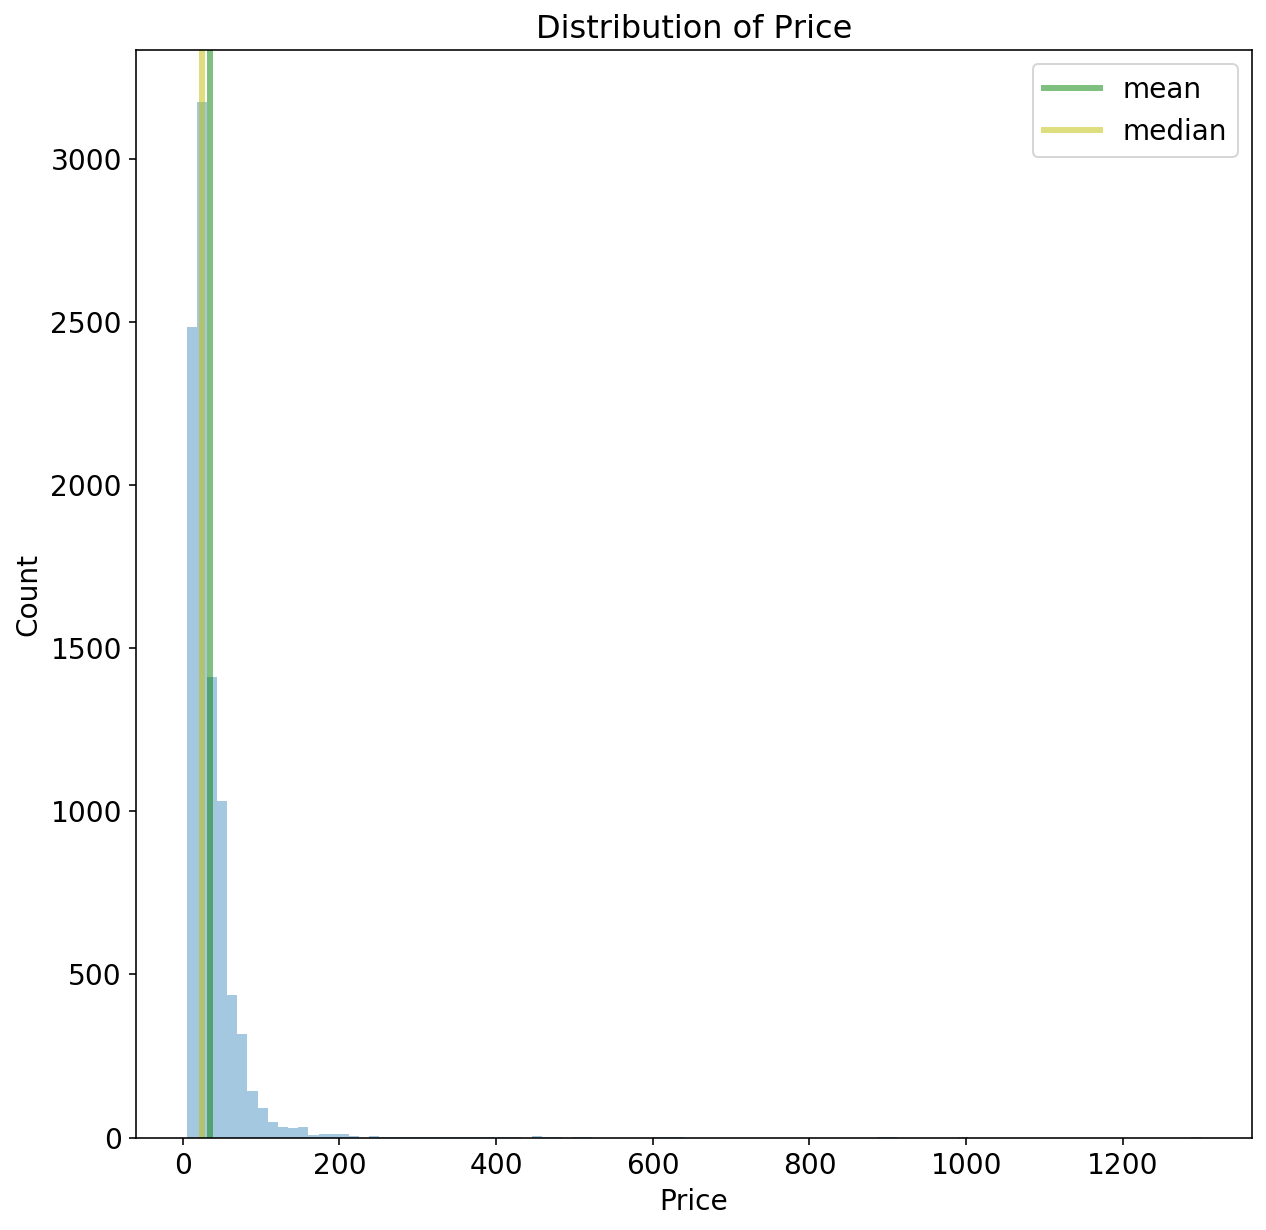

In [46]:
# set the plot size
figsize(10,10)
plt.rcParams['font.size'] = 14

# set the histogram, mean and median
sns.distplot(wines["price"].dropna(), kde=False, bins=100)

plt.axvline(x=wines.price.dropna().mean(), 
            linewidth=3, 
            color='g', 
            label="mean", 
            alpha=0.5)
plt.axvline(x=wines.price.dropna().median(), 
            linewidth=3, 
            color='y', 
            label="median", 
            alpha=0.5)

# set title, legends and labels
plt.xlabel("Price", size=14)
plt.ylabel("Count", size=14)
plt.title("Distribution of Price", size=16)
plt.legend(["mean", "median"])

Price shows an extremely right-skewed distribution telling us we have some outliers in the price column, let's have a closer look at them.

In [47]:
wines["price"].describe()

count    9323.000000
mean       35.447603
std        40.898626
min         5.000000
25%        17.000000
50%        25.000000
75%        42.000000
max      1300.000000
Name: price, dtype: float64

In [48]:
wines["price"].dropna().sort_values().tail(20)

3062     419.0
7153     426.0
5215     450.0
2793     450.0
7337     450.0
5047     450.0
8474     450.0
9178     450.0
7100     460.0
7290     469.0
5308     476.0
5016     500.0
8129     520.0
4781     612.0
5037     617.0
2642     639.0
5372     886.0
2462     900.0
817     1000.0
8967    1300.0
Name: price, dtype: float64

**Let's remove the outliers from the wines in terms of prices:**

In [49]:
# Calculate first and third quartile
# first_quartile = wines['price'].describe()['25%']
# third_quartile = wines['price'].describe()['75%']

# Interquartile range
# iqr = third_quartile - first_quartile

# Remove outliers
# wines = wines[(wines['price'] > (first_quartile - 3 * iqr)) &
#              (wines['price'] < (third_quartile + 3 * iqr))]

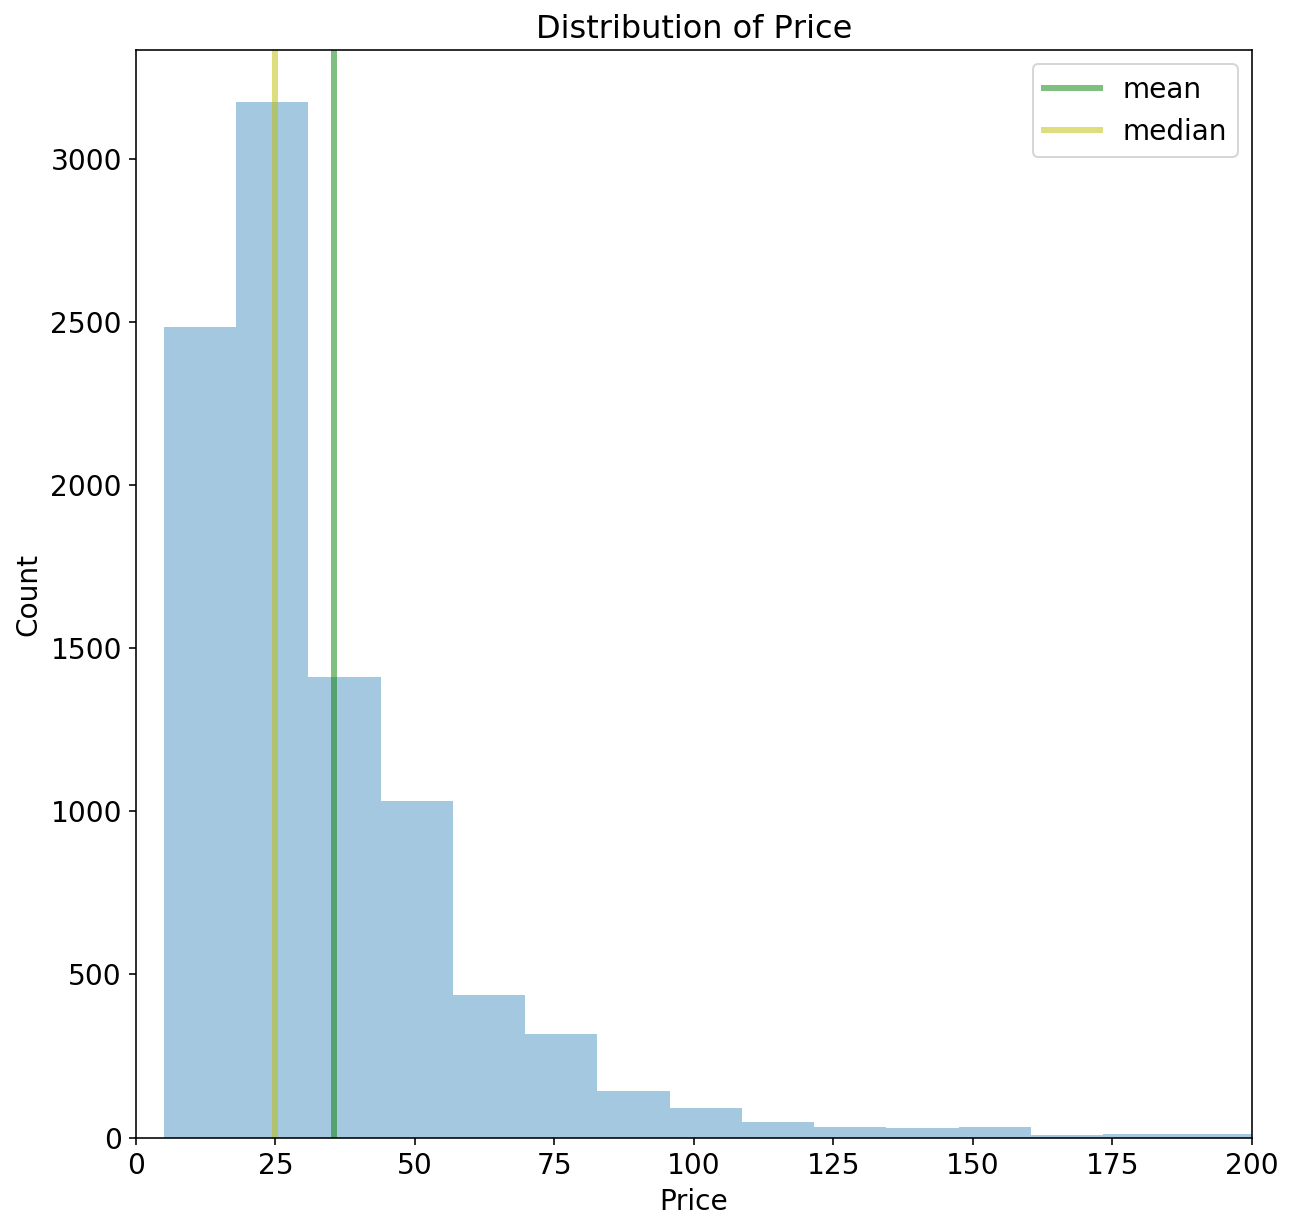

In [50]:
# set the plot size
figsize(10,10)
plt.rcParams['font.size'] = 14

# set the histogram, mean and median
sns.distplot(wines["price"].dropna(), kde=False, bins=100)
plt.axvline(x=wines.price.dropna().mean(), 
            linewidth=3, 
            color='g', 
            label="mean", 
            alpha=0.5)

plt.axvline(x=wines.price.dropna().median(), 
            linewidth=3, 
            color='y', 
            label="median", 
            alpha=0.5)

# set title, limit, legends and labels
plt.xlabel("Price", size=14)
plt.xlim(0, 200)
plt.ylabel("Count", size=14)
plt.title("Distribution of Price", size=16)
plt.legend(["mean", "median"])

In [51]:
#data.price.describe()

## 2.2. Looking for Relationships

### 2.2.1. Points - Country

In [52]:
countries = wines["country"].value_counts()
top_countries = list(countries[countries.values > 300].index)

In [53]:
top_countries

['US', 'France', 'Italy', 'Spain', 'Portugal', 'Chile', 'Argentina']

In [54]:
top2_countries = list(countries[(countries.values <= 300) & 
                                (countries.values >100)].
                      index)

In [55]:
top2_countries

['Austria', 'Germany', 'Australia', 'South Africa', 'New Zealand']

Text(0.5, 1.0, 'Density of Points Among Different Countries')

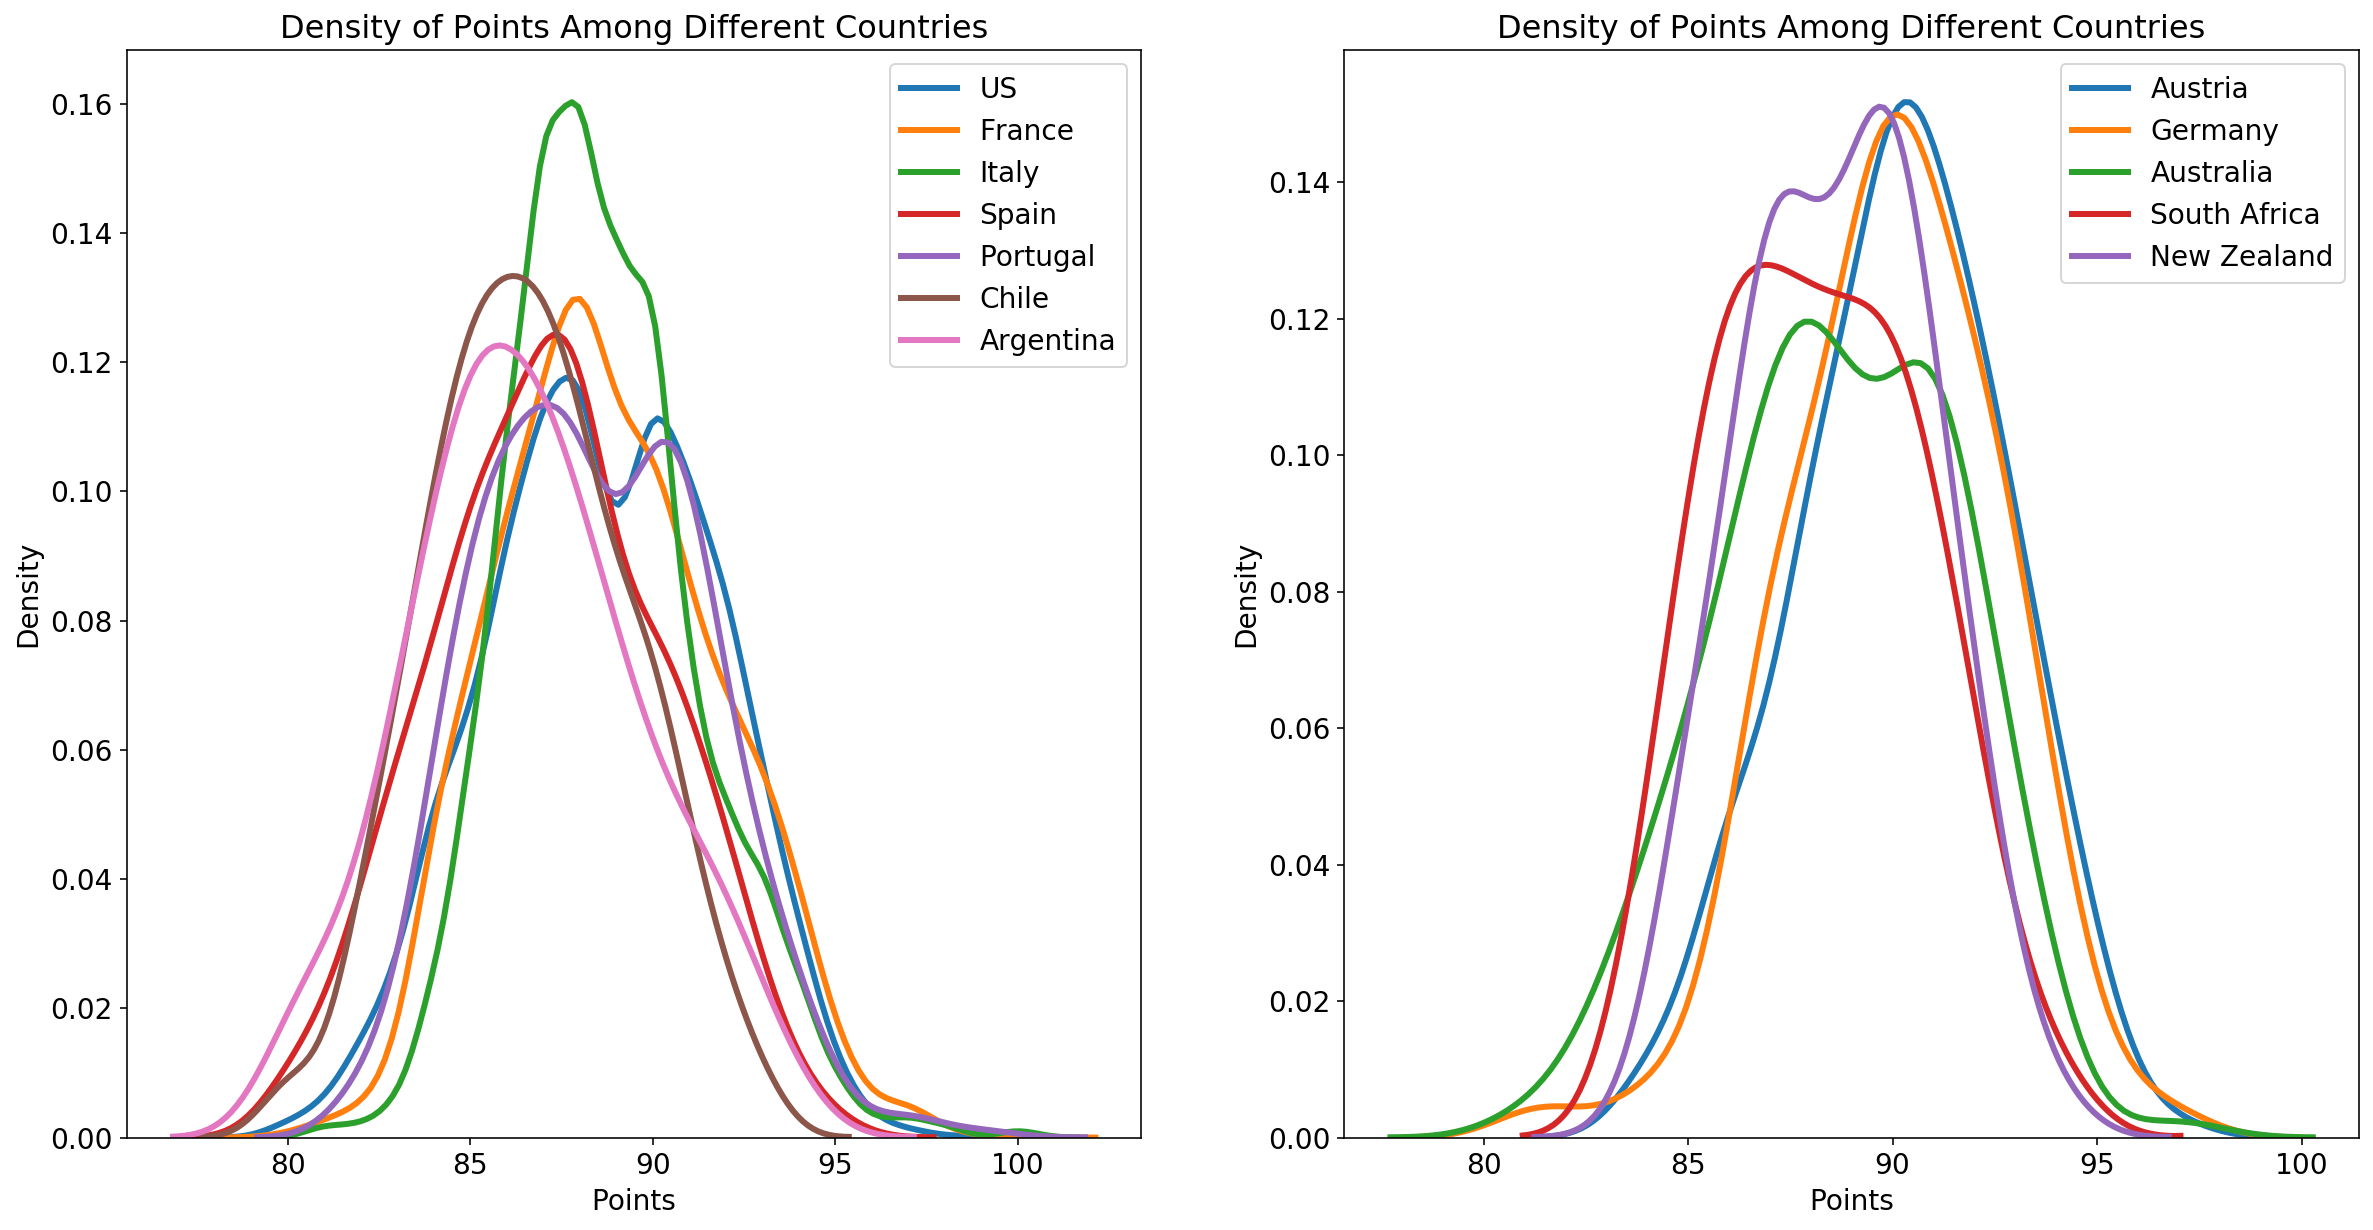

In [56]:
# distribution of the points in different countries
figsize(20, 10)
plt.rcParams['font.size'] = 14

# plot points distribution for top country
plt.subplot(1,2,1)
for country in top_countries:
    subset = wines[wines['country'] == country]
    sns.kdeplot(subset["points"], label=country, linewidth=3)

# set title, legends and labels
plt.ylabel("Density", size=14)
plt.xlabel("Points", size=14)
plt.title("Density of Points Among Different Countries", size=16)

# plot points distribution for top2 country
plt.subplot(1,2,2)
for country in top2_countries:
    subset = wines[wines['country'] == country]
    sns.kdeplot(subset["points"], label=country, linewidth=3)
    
# set title, legends and labels
plt.ylabel("Density", size=14)
plt.xlabel("Points", size=14)
plt.title("Density of Points Among Different Countries", size=16)

Country pairs that show same points distribution:

* US- Portugal
* Austria - Germany
* Chile - Argentina

### 2.2.2. Points - Price Relationship per Top Country

In [57]:
wines_top_countries = wines[(wines["country"] == "US") |
                            (wines["country"] == "France") |
                            (wines["country"] == "Italy") |
                            (wines["country"] == "Spain")]

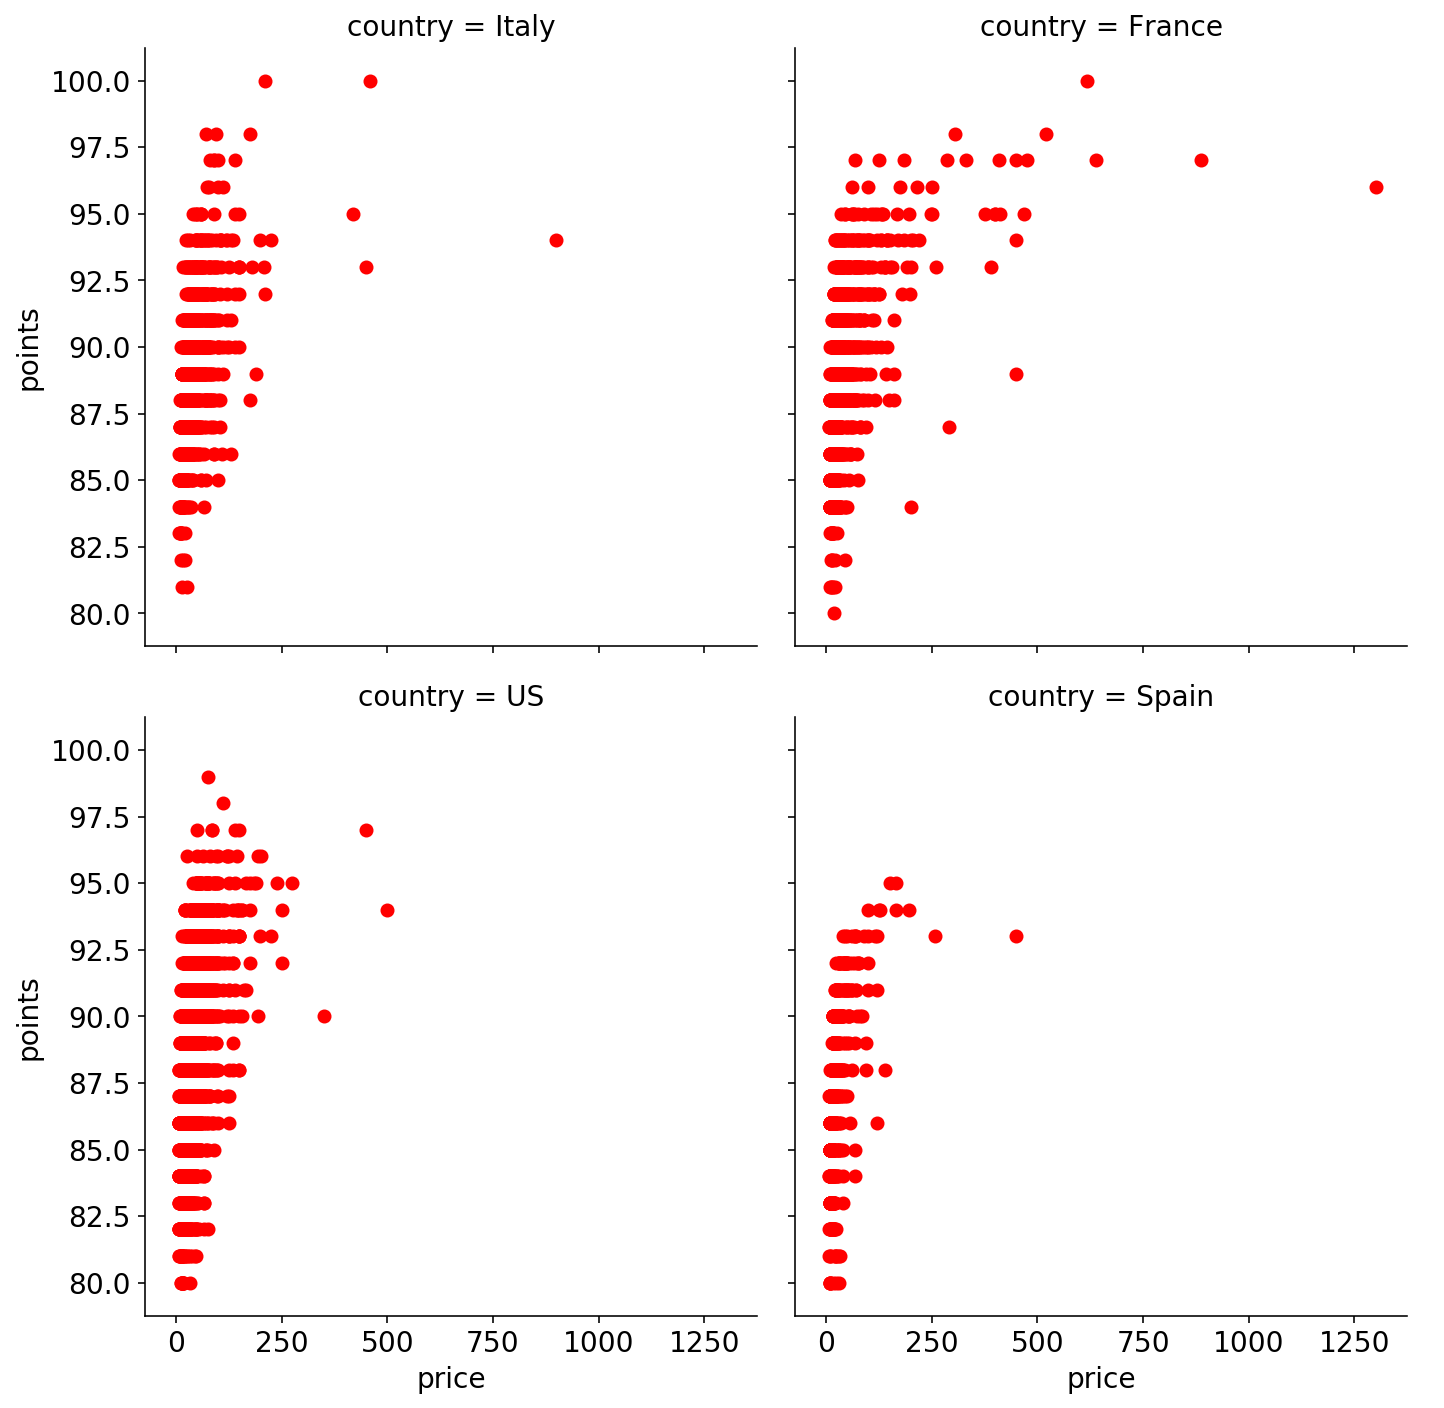

In [58]:
# plot relationship of soil type and cover type among different wilderness areas
g = sns.FacetGrid(wines_top_countries, col="country",
                  col_wrap=2, height=5)
g = (g.map(plt.scatter, "price", "points", color="r")
     .add_legend())

Text(0.5, 1.0, 'Points vs Price')

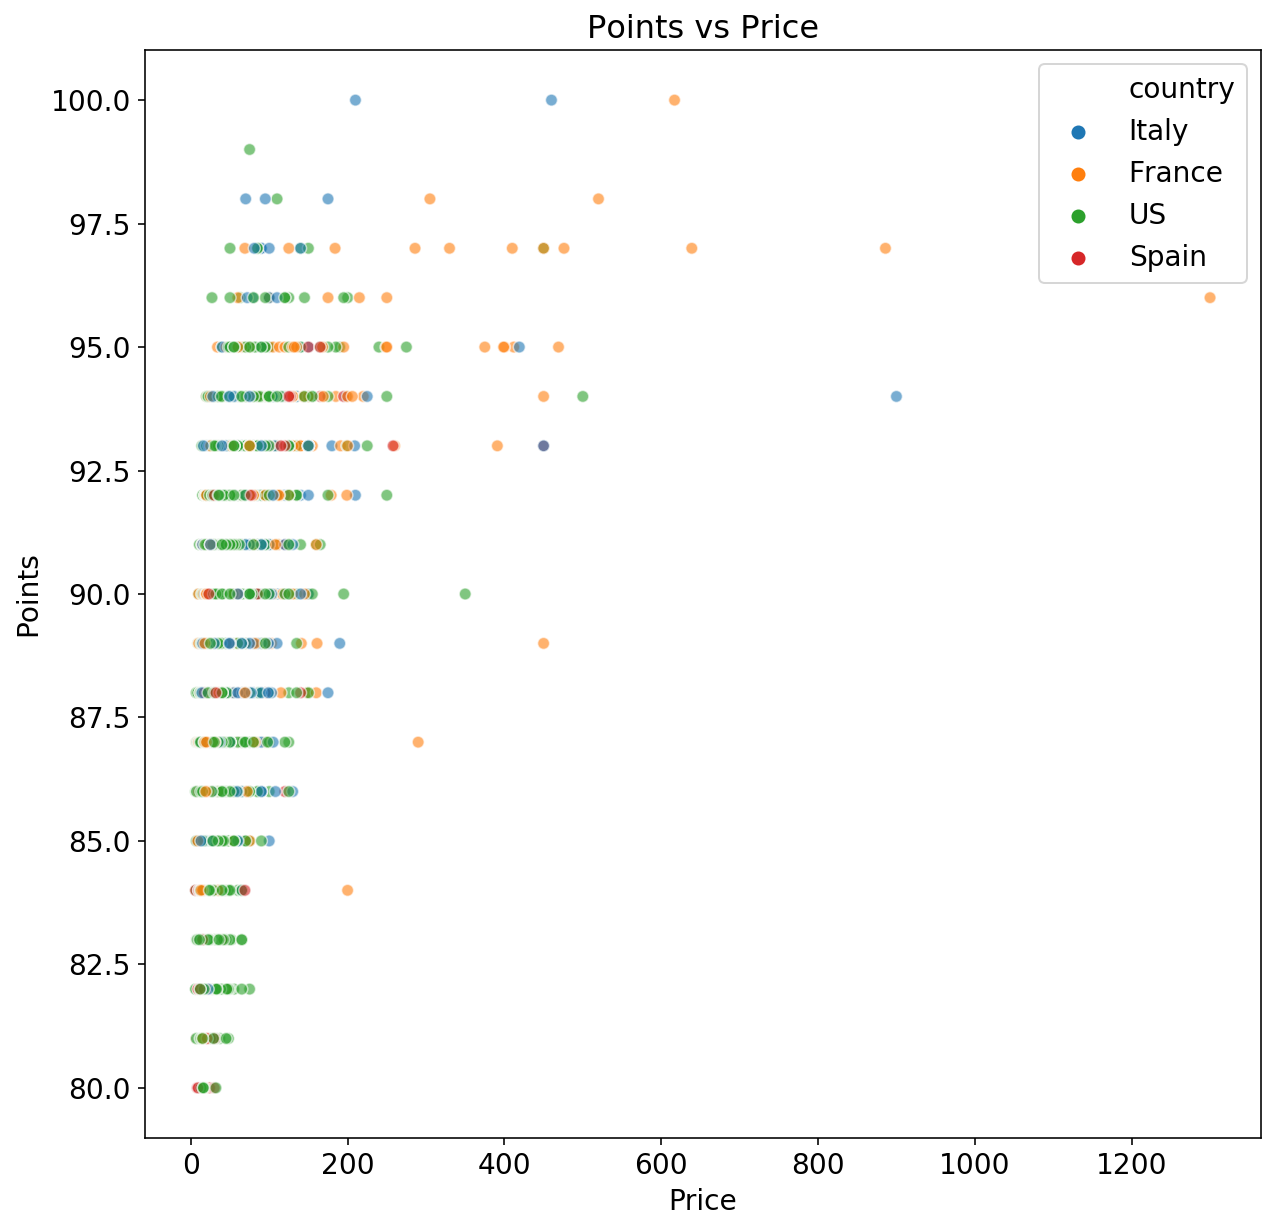

In [59]:
# set plot size and font size
figsize(10, 10)
plt.rcParams['font.size'] = 14

# plot a scatterplot of Points and Price
sns.scatterplot(x='price', y='points',
                hue='country', data=wines_top_countries,
                alpha=0.6)

# Plot labeling
plt.xlabel("Price", size=14)
plt.ylabel("Points", size=14)
plt.title("Points vs Price", size=16)

### 2.2.3. Points per Province

In [60]:
# for US
us_provinces = wines[wines["country"] == "US"]["province"].value_counts()
us_provinces = list(us_provinces.index)

# for France
fr_provinces = wines[wines["country"] == "France"]["province"].value_counts()
fr_provinces = list(fr_provinces.index)

# for Italy
it_provinces = wines[wines["country"] == "Italy"]["province"].value_counts()
it_provinces = list(it_provinces.index)

# for Spain
es_provinces = wines[wines["country"] == "Spain"]["province"].value_counts()
es_provinces = list(es_provinces.index)

Text(0.5, 1.0, 'Density of Points Among Spain Provinces')

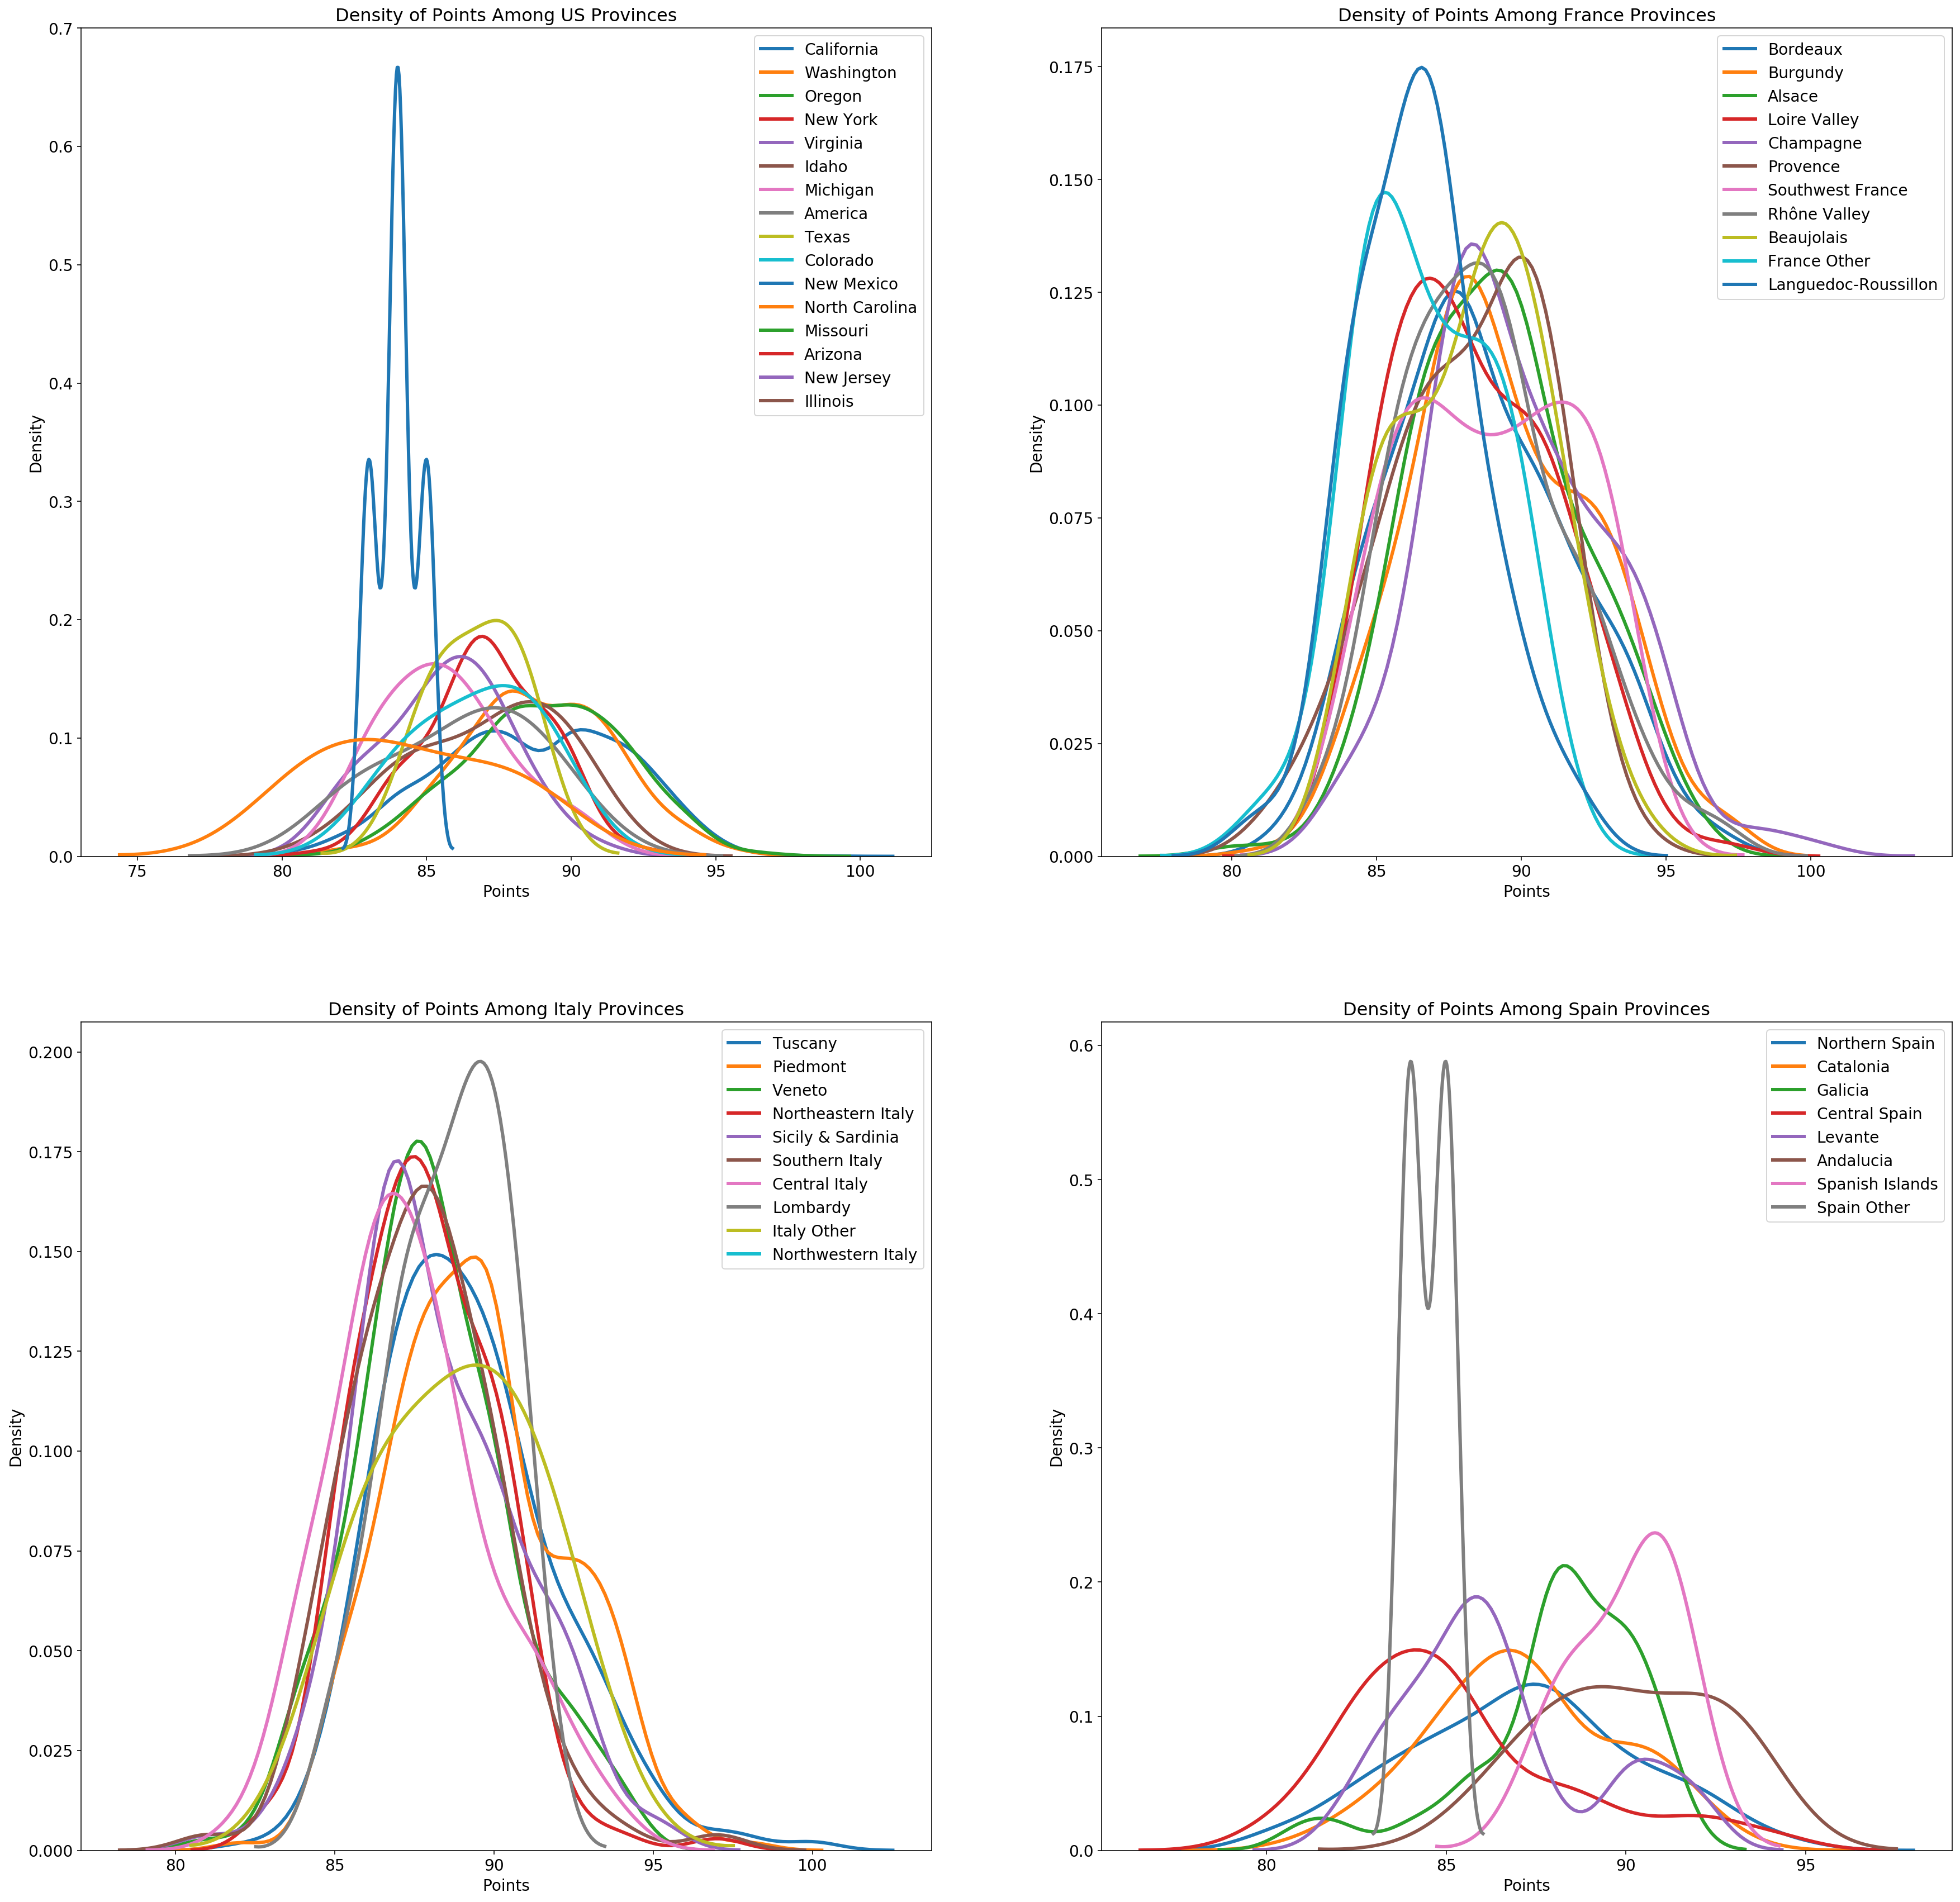

In [61]:
# distribution of provinces
figsize(30, 30)
plt.rcParams['font.size'] = 14

# plot points distribution for provinces
plt.subplot(2,2,1)
for province in us_provinces:
    subset = wines[wines['province'] == province]
    sns.kdeplot(subset["points"], label=province, linewidth=3)
plt.ylabel("Density", size=14)
plt.xlabel("Points", size=14)
plt.title("Density of Points Among US Provinces", size=16)

# plot points distribution for provinces
plt.subplot(2,2,2)
for province in fr_provinces:
    subset = wines[wines['province'] == province]
    sns.kdeplot(subset["points"], label=province, linewidth=3)

# set title, legends and labels
plt.ylabel("Density", size=14)
plt.xlabel("Points", size=14)
plt.title("Density of Points Among France Provinces", size=16)

# plot points distribution for provinces
plt.subplot(2,2,3)
for province in it_provinces:
    subset = wines[wines['province'] == province]
    sns.kdeplot(subset["points"], label=province, linewidth=3)

# set title, legends and labels
plt.ylabel("Density", size=14)
plt.xlabel("Points", size=14)
plt.title("Density of Points Among Italy Provinces", size=16)

# plot points distribution for provinces
plt.subplot(2,2,4)
for province in es_provinces:
    subset = wines[wines['province'] == province]
    sns.kdeplot(subset["points"], label=province, linewidth=3)

# set title, legends and labels
plt.ylabel("Density", size=14)
plt.xlabel("Points", size=14)
plt.title("Density of Points Among Spain Provinces", size=16)

### 2.2.4. Points per taster_name

Text(0.5, 1.0, 'Points from Different Tasters')

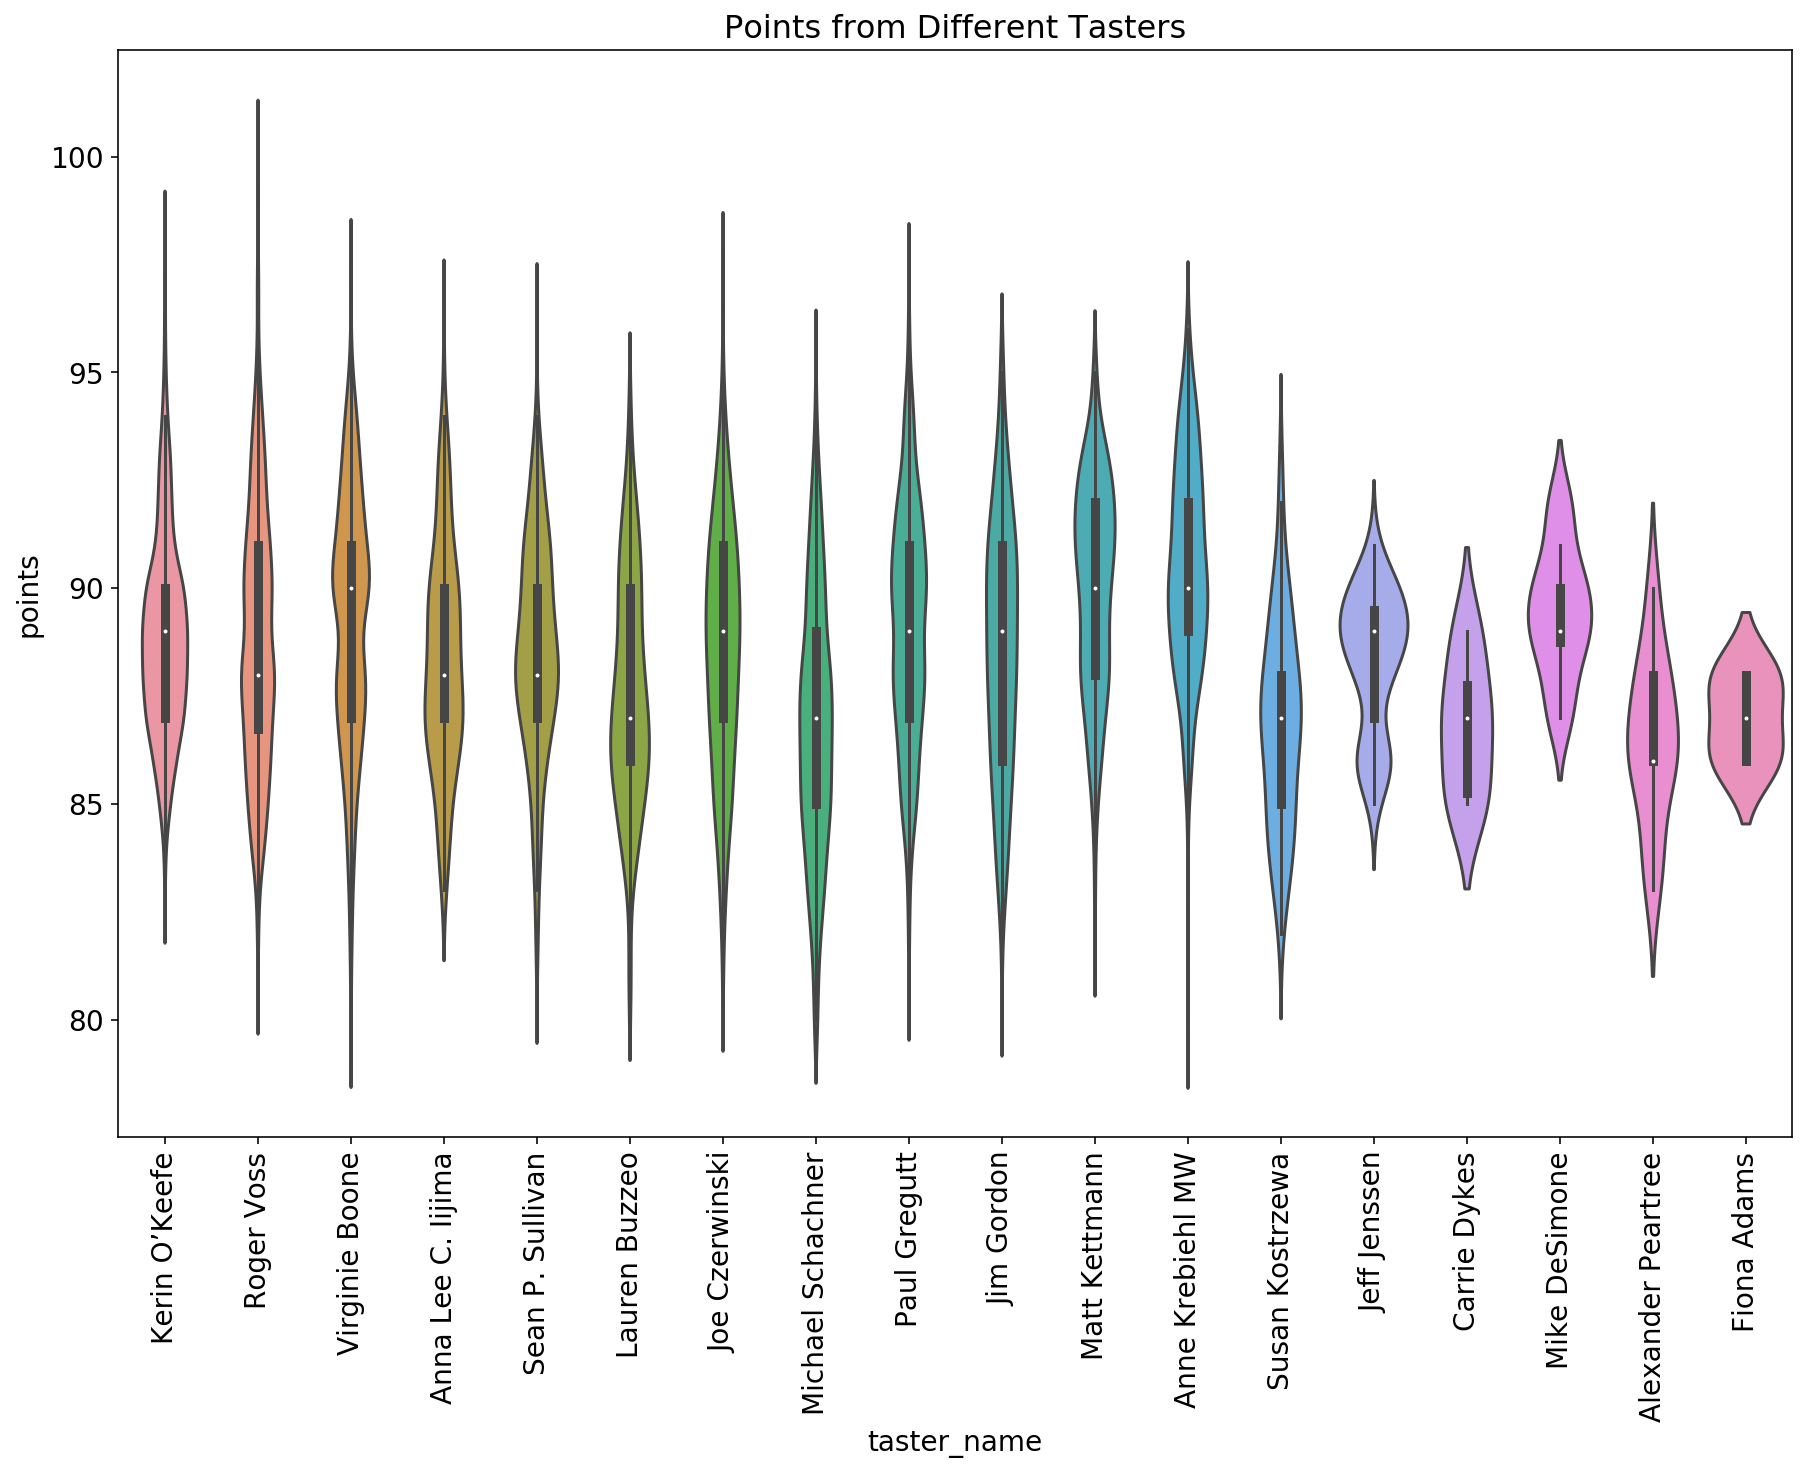

In [62]:
# set plot size and font size
figsize(15, 10)
plt.rcParams['font.size'] = 14

# violin plot to see statistics and distribution
f = sns.violinplot(data=wines,  x="taster_name", y="points")
f.set_xticklabels(f.get_xticklabels(), rotation=90)

plt.title("Points from Different Tasters", size=16)

### 2.2.5. Points per Variety

In [63]:
varieties = wines["variety"].value_counts()
varieties[varieties.values > 100]

Pinot Noir                  1015
Chardonnay                   950
Cabernet Sauvignon           766
Red Blend                    702
Bordeaux-style Red Blend     525
Riesling                     393
Sauvignon Blanc              377
Syrah                        324
Rosé                         278
Merlot                       221
Nebbiolo                     220
Zinfandel                    209
Sangiovese                   200
Malbec                       193
Portuguese Red               192
Sparkling Blend              182
White Blend                  174
Tempranillo                  146
Rhône-style Red Blend        124
Champagne Blend              116
Pinot Gris                   112
Cabernet Franc               109
Grüner Veltliner             108
Name: variety, dtype: int64

In [64]:
top_varieties = list(varieties[varieties.values > 500].index)

Text(0.5, 1.0, 'Density of Points Among Varieties')

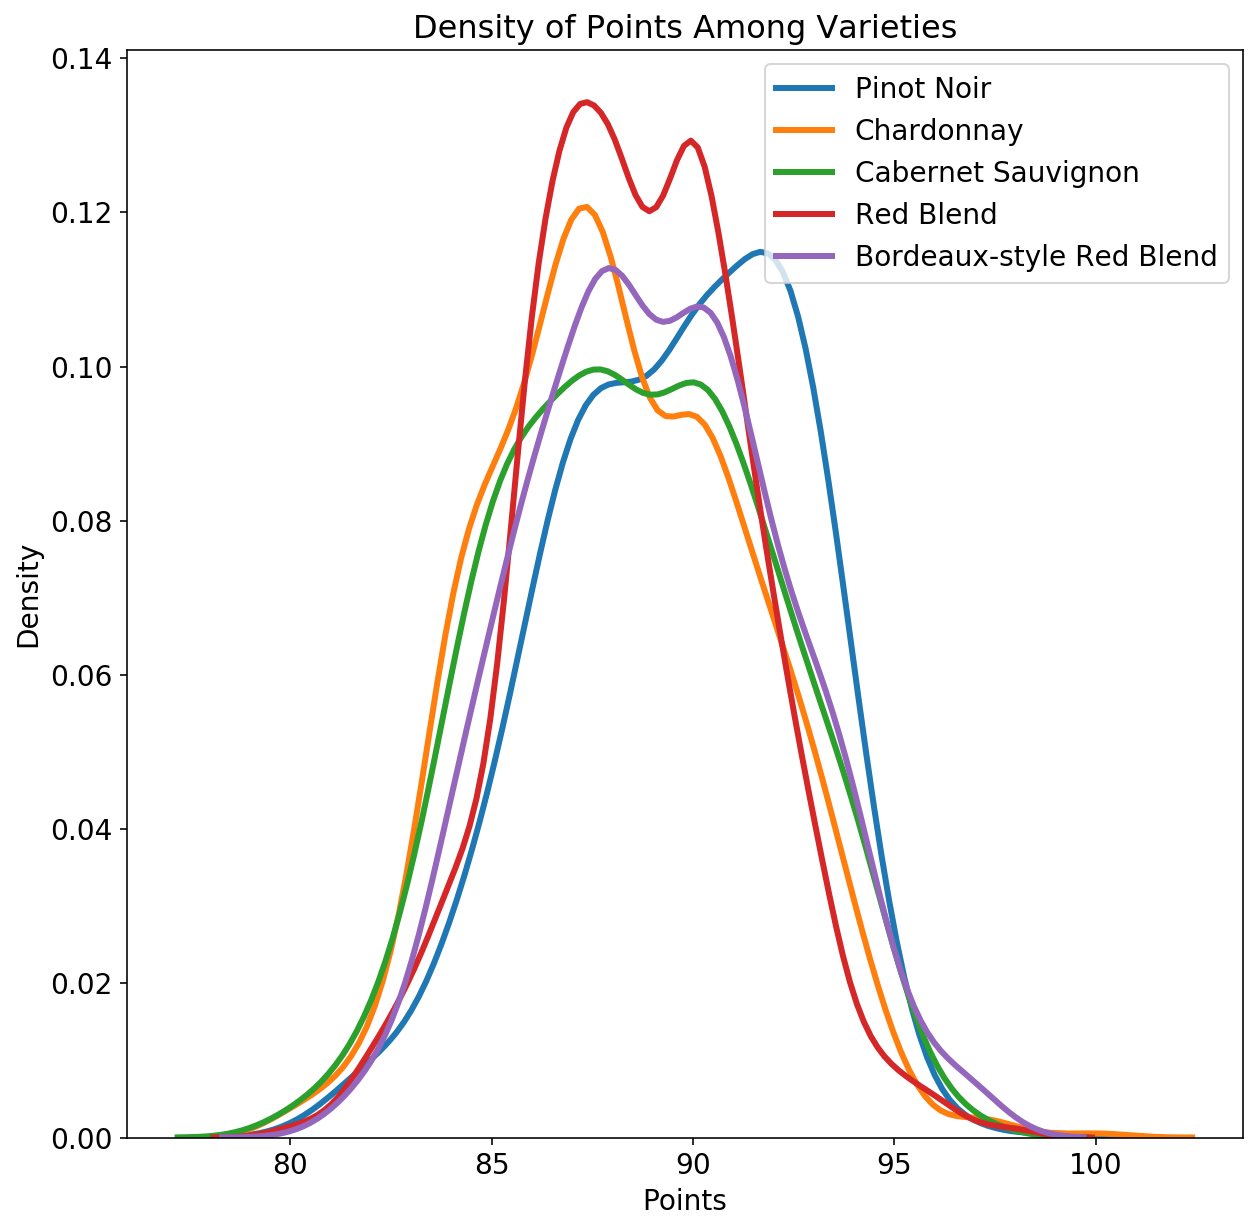

In [65]:
# set plot size and font size
figsize(10, 10)
plt.rcParams['font.size'] = 14

# plot points distribution for top country
for variety in top_varieties:
    subset = wines[wines['variety'] == variety]
    sns.kdeplot(subset["points"], label=variety, linewidth=3)

# set title, legends and labels
plt.ylabel("Density", size=14)
plt.xlabel("Points", size=14)
plt.title("Density of Points Among Varieties", size=16)

In [66]:
wines.province.value_counts()>100

California                   True
Washington                   True
Tuscany                      True
Bordeaux                     True
Oregon                       True
                            ...  
Curicó and Leyda Valleys    False
Tikves                      False
Samson                      False
Terras do Dão               False
Israel                      False
Name: province, Length: 248, dtype: bool

## 2.3. Summary from the data exploration

Points, the target variable shows a normal distribution with non-NA values. Price feature had outliers and they are removed in the *2.1.2. Distribution of Price* part. After the removal wines dataset number of rows reduced to 9116. Price value range diminished to 0 and 120.

Country feature, which is a categorical feature for us, its high frequency values are visualized. Some countries shows the similar distributions in terms of points. 

Price and the target value shows a positive trend. Majority of the wines are condensed under the price 80 and points 90.

New Mexico province from US stands out at the points distribution. Points of a wine shows different distributions among the visualized provinces.

Different taster's highly likely to award variety of points to different wines. Points distribution differ for the top varieties (Pinot Noir, Chardonay, Cabernet Savuignon and Red Blend)

In [67]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                9994 non-null   object 
 1   description            10000 non-null  object 
 2   designation            7171 non-null   object 
 3   points                 10000 non-null  int64  
 4   price                  9323 non-null   float64
 5   province               9994 non-null   object 
 6   region_1               8336 non-null   object 
 7   region_2               3853 non-null   object 
 8   taster_name            8015 non-null   object 
 9   taster_twitter_handle  7644 non-null   object 
 10  title                  10000 non-null  object 
 11  variety                10000 non-null  object 
 12  winery                 10000 non-null  object 
 13  title_numlist          10000 non-null  object 
 14  year                   9663 non-null   float64
 15  is_

In [68]:
wines.designation.unique()

array(['Kirchleiten', nan, 'Horseshoe Bend Vineyard', ...,
       'Rüdesheim Berg Rottland Erstes Gewächs', 'Magnolia',
       'Rosé in the Air'], dtype=object)

In [69]:
wines.region_1.unique()

array(['Alto Adige', 'Sancerre', 'Chianti Classico',
       'Russian River Valley', 'Dry Creek Valley',
       'North Fork of Long Island', 'Paso Robles', 'Sauternes',
       'Bordeaux Blanc', 'Red Mountain', nan, 'Frankland River',
       'Western Australia', 'Prosecco', 'McLaren Vale',
       'Alexander Valley', 'Rutherglen',
       'Amarone della Valpolicella Classico', 'Luján de Cuyo',
       'Bordeaux Supérieur', 'Salta', 'Anderson Valley', 'Napa Valley',
       'Tasmania', 'Columbia Valley (WA)', 'Brunello di Montalcino',
       'Barolo', 'Oak Knoll District', 'Sonoma Valley', 'Limestone Coast',
       'Sable de Camargue', 'Carneros', 'Bordeaux',
       'Blaye Côtes de Bordeaux', 'Oregon', 'Lodi', 'Eola-Amity Hills',
       'Rueda', 'St. Helena', 'Willamette Valley', 'Santa Ynez Valley',
       'Cava', 'Vino de la Tierra del Bajo Aragón', 'Oakville',
       'Wahluke Slope', 'Alsace', 'Carneros-Napa Valley',
       'Monterey County', 'Getariako Txakolina', "Barbera d'Alba",
      

In [70]:
wines.region_2.unique()

array([nan, 'Sonoma', 'Long Island', 'Central Coast', 'Columbia Valley',
       'Napa', 'Napa-Sonoma', 'Oregon Other', 'Central Valley',
       'Willamette Valley', 'California Other', 'Finger Lakes',
       'New York Other', 'Southern Oregon', 'South Coast',
       'Sierra Foothills', 'North Coast', 'Washington Other'],
      dtype=object)

In [71]:
wines.taster_name.value_counts()

Roger Voss            1956
Michael Schachner     1208
Kerin O’Keefe          861
Paul Gregutt           747
Virginie Boone         719
Matt Kettmann          462
Joe Czerwinski         386
Sean P. Sullivan       361
Anna Lee C. Iijima     335
Jim Gordon             325
Anne Krebiehl MW       295
Lauren Buzzeo          156
Susan Kostrzewa         80
Jeff Jenssen            43
Mike DeSimone           40
Alexander Peartree      26
Carrie Dykes            10
Fiona Adams              5
Name: taster_name, dtype: int64

In [ ]:
color_red = {
    "Pinot Noir": 1,
    "Chardonnay": 0,
    "Cabernet Sauvignon": 1,
    "Red Blend": 0,
    "Bordeaux-style Red Blend": 1,
    "Riesling": 0,
    "Sauvignon Blanc": 0,
    "Syrah": 1,
    "Rosé": 0,
    "Nebbiolo": 1,
    "Merlot": 1,
    "Zinfandel": 1, 
    "Sangiovese": 1, 
    "Malbec": 1, 
    "Portuguese Red": 1,
    "Sparkling Blend": 0,
    "White Blend": 0, 
    "Tempranillo": 1,
    "Rhône-style Red Blend": 1,
    "Champagne Blend": 0, 
    "Grüner Veltliner": 0,
    "Cabernet Franc": 1, 
    "Pinot Gris": 0,
    "Pinot Grigio": 0,
    "Portuguese White": 0,
    "Bordeaux-style White Blend": 0,
    "Gamay": 1,
    "Gewürztraminer": 0,
    "Petite Sirah": 1,
    "Viognier": 0, 
    "Shiraz": 1, 
    "Grenache": 0,
    "Port": 1,
    "Chenin Blanc": 0,
    "Sangiovese Grosso": 1,
    "Glera": 0,
    "Barbera": 1,
    "Tempranillo Blend": 1, 
    "Rhône-style White Blend": 0, 
    "Carmenère": 1, 
    "Pinot Blanc": 0, 
    "Corvina, Rondinella, Molinara": 1,
    "Albariño": 0, 
    "Aglianico": 1,  
    "Pinot Bianco": 0,
    "Meritage": 1, 
    "Moscato": 0,
    "Verdejo": 0,
    "Nero d'Avola": 1, 
    "Melon": 0, 
    "Blaufränkisch": 1, 
    "Zweigelt": 1, 
    "Torrontés": 0, 
    "Garganega": 0, 
    "Garnacha": 1, 
    "Prosecco": 0, 
    "Vermentino": 0, 
    "Tinta de Toro": 1,
    "Mencía": 1, 
    "Pinotage": 1, 
    "Primitivo": 1, 
    "Grenache Blanc": 0, 
    "Mourvèdre": 1, 
    "Alvarinho": 0, 
    "Sémillon": 0, 
    "G-S-M": 1, 
    "Petit Verdot": 1, 
    "Roussanne": 0, 
    "Tannat": 1, 
    "Dolcetto": 1, 
    "Fiano": 0, 
    "Touriga Nacional": 1, 
    "Greco": 0, 
    "Montepulciano": 1, 
    "Arinto": 0, 
    "Pinot Nero": 1, 
    "Sauvignon": 1, 
    "Viura": 0, 
    "Carignan": 1, 
    "Verdicchio": 0, 
    "Falanghina": 0, 
    "Lagrein": 1, 
    "Bonarda": 1, 
    "Vernaccia": 0, 
    "Monastrell": 1, 
    "Cabernet Blend": 1, 
    "Malbec-Merlot": 1, 
    "Rosado": 0, 
    "Sagrantino": 1,
    "Cabernet Sauvignon-Syrah": 1, 
    "Turbiana": 0, 
    "Portuguese Sparkling": 0, 
    "Carricante": 0, 
    "Friulano": 0, 
    "Pecorino": 0, 
    "Müller-Thurgau": 0, 
    "St. Laurent": 1, 
    "Weissburgunder": 0,
    "Verdelho ": 0, 
    "Nerello Mascalese": 1, 
    "Sherry": 1, 
    "Furmint": 0, 
    "Tempranillo-Garnacha": 1,
    "Cortese": 0, 
    "Semillon-Sauvignon Blanc": 0, 
    "Ribolla Gialla": 0, 
    "Rosato": 0, 
    "Grillo": 0, 
    "Sylvaner": 0, 
    "Spätburgunder": 1, 
    "Austrian Red Blend": 1, 
    "Chardonnay-Viognier": 0, 
    "Syrah-Grenache": 1,
    "Godello": 0, 
    "Fumé Blanc": 0, 
    "Negroamaro": 1,
    "Trebbiano": 0, 
    "Graciano": 1,
    "Teroldego":1, 
    "Austrian white blend": 0, 
    "Cabernet Sauvignon-Shiraz":1, 
    "Nero di Troia": 1, 
    "Arneis":0, 
    "Silvaner": 0, 
    "Picolit": 0, 
    "Alicante Bouschet": 1, 
    "Agiorgitiko": 1, 
    "Garnacha Blanca": 0, 
    "Pedro Ximénez": 0, 
    "Muscat Canelli": 0, 
    "Pinot Meunier": 0, 
    "Cabernet Sauvignon-Carmenère": 1,
    "Moscato Giallo": 0, 
    "Charbono": 1, 
    "Provence red blend": 1, 
    "Jacquère":0, 
    "Albana": 0, 
    "Cabernet Sauvignon-Merlot": 1, 
    "Tinto Fino": 1, 
    "Moscatel": 0,
    "Carignane": 1, 
    "Vidal Blanc": 0, 
    "Tannat-Cabernet": 1, 
    "Marsanne":0, 
    "Shiraz-Cabernet Sauvignon": 1,
    "Petit Manseng":0, 
    "Sauvignon Blanc-Semillon":0, 
    "Frappato": 1, 
    "Provence white blend": 0, 
    "Fernão Pires": 0, 
    "Lambrusco": 1,
    "Grenache-Syrah": 1,
    "Rotgipfler": 0, 
    "Merlot-Cabernet Sauvignon": 1, 
    "Chasselas": 0, 
    "Alsace white blend": 0, 
    "Prugnolo Gentile": 1,
    "Encruzado": 0,
    "Muscat": 0,
    "Scheurebe": 0,
    "Shiraz-Viognier": 1, 
    "Prieto Picudo": 1, 
    "Gamay Noir":1 , 
    "Bobal": 1,
    "Monastrell-Syrah": 1, 
    "Assyrtico": 0, 
    "Pansa Blanca": 0, 
    "Pinot Noir-Gamay": 1,
    "Syrah-Mourvèdre": 1,
    "Malagousia":0, 
    "Muskat Ottonel": 0, 
    "Alfrocheiro": 1, 
    "Cabernet-Syrah": 1,
    "Passerina": 0,
    "Baga": 1, 
    "Marselan": 1, 
    "Semillon-Chardonnay": 0, 
    "Shiraz-Grenache": 1,
    "Trousseau Gris":0, 
    "Cabernet Sauvignon-Malbec": 1, 
    "Altesse": 0,
    "Syrah-Petite Sirah": 1,
    "Petite Verdot": 1,
    "Xinomavro":1,
    "Cabernet Sauvignon-Cabernet Franc": 1,
    "Mansois":1 , 
    "Syrah-Cabernet": 1, 
    "Auxerrois": 0,
    "Pallagrello Bianco": 0, 
    "Malbec-Cabernet Sauvignon": 1, 
    "Uva di Troia": 1, 
    "Brachetto": 1, 
    "Xarel-lo": 0,
    "Castelão": 1, 
    "Macabeo": 0,
    "Colombard-Sauvignon Blanc": 0, 
    "Muscat Blanc": 0, 
    "Catarratto": 0, 
    "Rkatsiteli": 0,
    "Viura-Chardonnay": 0, 
    "Moschofilero": 0, 
    "Ugni Blanc-Colombard": 0, 
    "Gros and Petit Manseng": 0, 
    "Cabernet Merlot": 1, 
    "Malbec-Syrah":1, 
}